# Spam Detector

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Retrieve the Data

The data is located at [https://static.bc-edx.com/ai/ail-v-1-0/m13/challenge/spam-data.csv](https://static.bc-edx.com/ai/ail-v-1-0/m13/challenge/spam-data.csv)

Dataset Source: [UCI Machine Learning Library](https://archive.ics.uci.edu/dataset/94/spambase)

Import the data using Pandas. Display the resulting DataFrame to confirm the import was successful.

In [2]:
# Import the data
data = pd.read_csv("https://static.bc-edx.com/ai/ail-v-1-0/m13/challenge/spam-data.csv")
data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


## Predict Model Performance

You will be creating and comparing two models on this data: a Logistic Regression, and a Random Forests Classifier. Before you create, fit, and score the models, make a prediction as to which model you think will perform better. You do not need to be correct! 

Write down your prediction in the designated cells in your Jupyter Notebook, and provide justification for your educated guess.

*Replace the text in this markdown cell with your predictions, and be sure to provide justification for your guess.*

## Split the Data into Training and Testing Sets

In [3]:
# Create the labels set `y` and features DataFrame `X`

y = data['spam']
X = data.drop('spam', axis=1)

In [4]:
# Check the balance of the labels variable (`y`) by using the `value_counts` function.
y.value_counts()

spam
0    2788
1    1813
Name: count, dtype: int64

In [5]:
# Split the data into X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X,y)


## Scale the Features

Use the `StandardScaler` to scale the features data. Remember that only `X_train` and `X_test` DataFrames should be scaled.

In [6]:
from sklearn.preprocessing import StandardScaler

# Create the StandardScaler instance
scaler = StandardScaler()

In [7]:
# Fit the Standard Scaler with the training data
scaler.fit(X_train)


StandardScaler()

In [8]:
# Scale the training data
X_train_scaled = scaler.transform(X_train)


## Create and Fit a Logistic Regression Model

Create a Logistic Regression model, fit it to the training data, make predictions with the testing data, and print the model's accuracy score. You may choose any starting settings you like. 

In [9]:
# Train a Logistic Regression model and print the model score
from sklearn.linear_model import LogisticRegression

X_test_scaled = scaler.fit_transform(X_test)


lrModel = LogisticRegression(random_state=1)
lrModel

LogisticRegression(random_state=1)

In [10]:
# Make and save testing predictions with the saved logistic regression model using the test data
lrModel.fit(X_train_scaled, y_train)


# Review the predictions
test_predictions = lrModel.predict(X_test_scaled)
test_predictions

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [11]:
# Calculate the accuracy score by evaluating `y_test` vs. `testing_predictions`.
accuracy_score(y_test, test_predictions)

0.9226759339704604

## Create and Fit a Random Forest Classifier Model

Create a Random Forest Classifier model, fit it to the training data, make predictions with the testing data, and print the model's accuracy score. You may choose any starting settings you like. 

In [12]:
# Train a Random Forest Classifier model and print the model score
from sklearn.ensemble import RandomForestClassifier


In [13]:
# Make and save testing predictions with the saved logistic regression model using the test data
# Train a Random Forest Classifier model and print the model score

rfcModel = RandomForestClassifier(n_estimators=100, random_state=1)

rfcModel.fit(X_train_scaled, y_train)

# Review the predictions
y_predictions = rfcModel.predict(X_test_scaled)

y_predictions

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [14]:
# Calculate the accuracy score by evaluating `y_test` vs. `testing_predictions`.
accuracy_score(y_test, y_predictions)

0.9296264118158123

## Evaluate the Models

Which model performed better? How does that compare to your prediction? Write down your results and thoughts in the following markdown cell.

*Replace the text in this markdown cell with your answers to these questions.*

- Random Forest Classifier model provides better accuracy score than the Logistic Regression model. The accuracy score of the Random Forest Classifier is 0.93.
- The Random Forest Classifier model has a higher F1 score for both 1 and 0 classes based on test data confusion matrix.

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

##### Confusion matrix for Logisitic Regression Model

              precision    recall  f1-score   support

           1       0.94      0.87      0.90       478
           0       0.91      0.96      0.94       673

    accuracy                           0.92      1151
   macro avg       0.93      0.92      0.92      1151
weighted avg       0.92      0.92      0.92      1151



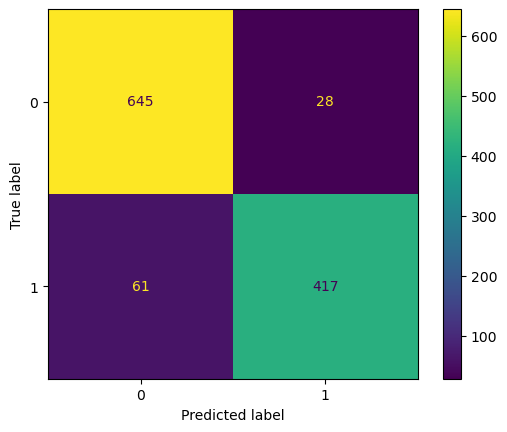

In [16]:

print(classification_report(y_test, test_predictions, labels = [1, 0]))

cm1 = confusion_matrix(y_test, test_predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm1 )
disp.plot()

##### Confusion matrix for Random Forest Classifier Model

              precision    recall  f1-score   support

           1       0.98      0.85      0.91       478
           0       0.90      0.99      0.94       673

    accuracy                           0.93      1151
   macro avg       0.94      0.92      0.93      1151
weighted avg       0.93      0.93      0.93      1151



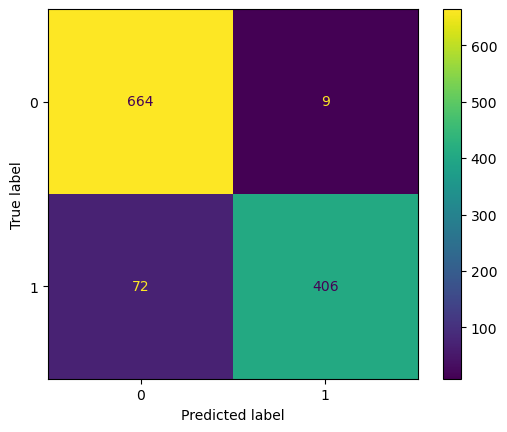

In [17]:
cm2 = confusion_matrix(y_test, y_predictions)
print(classification_report(y_test, y_predictions, labels = [1, 0]))
disp = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp.plot()